# Introduction to Convolutional Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **
Hamza ZBIRI


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [12]:
# UNCOMMENT IF USING COLAB
#from google.colab import drive
#drive.mount('/content/drive')
IMDIR = 'Z:/dataset/'

In [13]:
def load_dataset(IMDIR):
    train_dataset = h5py.File(IMDIR+'dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File(IMDIR+'dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)

#### Visualize data

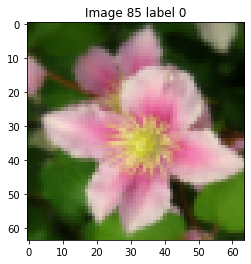

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [21]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [22]:
train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

train_x = train_x/255.
test_x = test_x/255.

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input has already three channels
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** Display the ROC curve of at least 3 different CNN configurations and compare them to the best single neuron model


In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset(IMDIR)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
#build the model
num_classes = 2
input_shape = (64,64,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [45]:
#comiple and fit
batch_size = 20
epochs = 15

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
10/10 [==============================] - 0s 36ms/step - loss: 0.6323 - accuracy: 0.6383 - val_loss: 0.5264 - val_accuracy: 0.8095
Epoch 2/15
10/10 [==============================] - 0s 30ms/step - loss: 0.5373 - accuracy: 0.6809 - val_loss: 0.4913 - val_accuracy: 0.7619
Epoch 3/15
10/10 [==============================] - 0s 32ms/step - loss: 0.4707 - accuracy: 0.7500 - val_loss: 0.5501 - val_accuracy: 0.8095
Epoch 4/15
10/10 [==============================] - 0s 25ms/step - loss: 0.5238 - accuracy: 0.7340 - val_loss: 0.5865 - val_accuracy: 0.8095
Epoch 5/15
10/10 [==============================] - 0s 26ms/step - loss: 0.4771 - accuracy: 0.7287 - val_loss: 0.5362 - val_accuracy: 0.7619
Epoch 6/15
10/10 [==============================] - 0s 28ms/step - loss: 0.4414 - accuracy: 0.8298 - val_loss: 0.4768 - val_accuracy: 0.7619
Epoch 7/15
10/10 [==============================] - 0s 28ms/step - loss: 0.3942 - accuracy: 0.7553 - val_loss: 0.5332 - val_accuracy: 0.7143
Epoch 8/15
10

In [46]:
#evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4497854709625244
Test accuracy: 0.8199999928474426


## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients

